In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df_100 = pd.read_csv('schelling_values_100_model_2.csv',delimiter=";")
df_1000 = pd.read_csv('schelling_values_1000_model_2.csv',delimiter=";")
df_100= df_100[df_100['number of iterations'] !=30000]
df_100 = df_100.groupby('vacant').mean()
df_1000 = df_1000.groupby('vacant').mean()

In [9]:
df_1000['interratial pears dif'] = df_1000['mean interratial pears final'] - df_1000['mean interratial pears inicial']

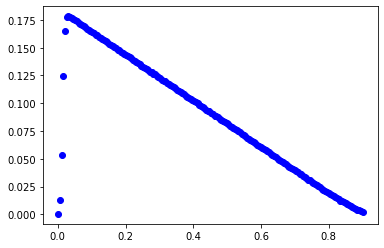

In [10]:
plt.plot(df_1000.index,df_1000['interratial pears dif'],'bo')

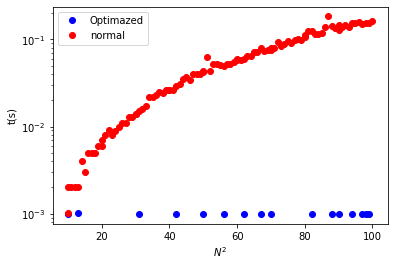

In [11]:
df = pd.read_csv('schelling_optimization_size_0-01.csv',delimiter=";")
plt.plot(df['size'],df['optimized time(s)'],'bo',label="Optimazed")
plt.plot(df['size'],df['normal time(s)'],'ro',label="normal")
plt.xlabel(r"$N^{2}$")
plt.ylabel("t(s)")
plt.yscale("log")
plt.legend()
plt.savefig('optimization_1.png')

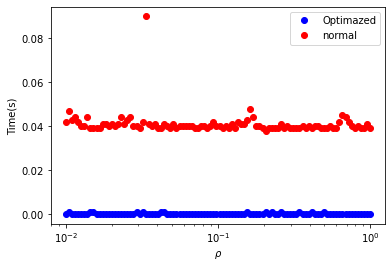

In [12]:
df = pd.read_csv('schelling_optimization_empty_50.csv',delimiter=";")
plt.plot(df['empty'],df['optimized time(s)'],'bo',label="Optimazed")
plt.plot(df['empty'],df['normal time(s)'],'ro',label="normal")
plt.xlabel(r'$\rho$')
plt.ylabel("Time(s)")
plt.xscale('log')
plt.legend()
plt.savefig('optimization_2.png')

In [13]:
df2 = pd.read_csv('schelling_values_100_model_2_30.csv',delimiter=";")
df3 = pd.read_csv('schelling_values_100_model_3_30.csv',delimiter=";")
df2 = df2.where(df2['number of iterations']!=30000)
df3 = df3.where(df3['number of iterations']!=30000)
indexes = df2['vacant'].drop_duplicates().dropna()
cols = ['vacant','similarity ratio inicial','mean dissatisfaction inicial','mean interratial pears inicial A','mean interratial pears inicial B','mean interratial pears inicial','similarity ratio final',\
        'mean dissatisfaction final','mean interratial pears final A','mean interratial pears final B','mean interratial pears final','number of iterations']
deviation2 = pd.DataFrame(columns=cols)
deviation3 = pd.DataFrame(columns=cols)
count  =0
for i in indexes:
    deviation2.loc[count] = df2.where(df2['vacant']==i).std()
    deviation3.loc[count] = df3.where(df3['vacant']==i).std()
    count +=1
df2 = df2.groupby("vacant").mean()
df3 = df3.groupby("vacant").mean()

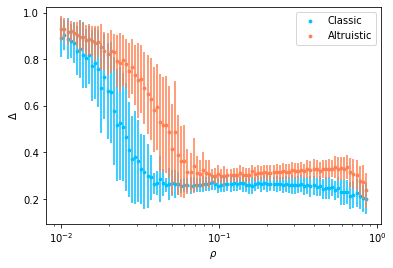

In [14]:
plt.errorbar(df2.index,df2['mean interratial pears final'],yerr=deviation2['mean interratial pears final'],ls = "None",color="deepskyblue")
plt.errorbar(df3.index,df3['mean interratial pears final'],yerr=deviation3['mean interratial pears final'],ls = "None",color="coral")
plt.scatter(df2.index,df2['mean interratial pears final'],s=8,marker='o',color="deepskyblue",label="Classic")
plt.scatter(df3.index,df3['mean interratial pears final'],s=8,marker='o',color="coral",label="Altruistic")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\Delta$")
plt.xscale('log')
plt.legend()
plt.savefig("interratial_peers.png")

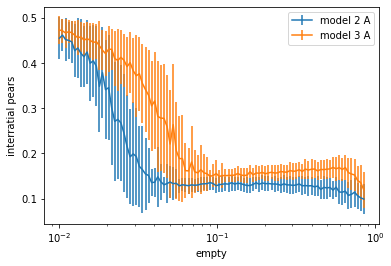

In [15]:
plt.errorbar(df2.index,df2['mean interratial pears final A'],yerr=deviation2['mean interratial pears final A'],label="model 2 A")
plt.errorbar(df3.index,df3['mean interratial pears final A'],yerr=deviation3['mean interratial pears final A'],label="model 3 A")
plt.xlabel("empty")
plt.ylabel("interratial pears")
plt.xscale('log')
plt.legend()

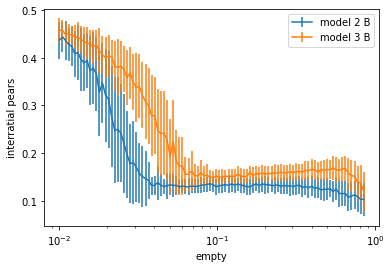

In [16]:
plt.errorbar(df2.index,df2['mean interratial pears final B'],yerr=deviation2['mean interratial pears final B'],label="model 2 B")
plt.errorbar(df3.index,df3['mean interratial pears final B'],yerr=deviation3['mean interratial pears final B'],label="model 3 B")
plt.xlabel("empty")
plt.ylabel("interratial pears")
plt.xscale('log')
plt.legend()

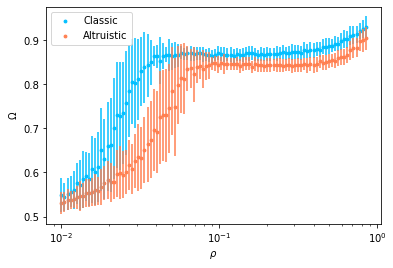

In [17]:
plt.errorbar(df2.index,df2['similarity ratio final'],yerr=deviation2['similarity ratio final'],ls = "None",color="deepskyblue")
plt.errorbar(df3.index,df3['similarity ratio final'],yerr=deviation3['similarity ratio final'],ls = "None",color="coral")
plt.scatter(df2.index,df2['similarity ratio final'],s=8,marker='o',color="deepskyblue",label="Classic")
plt.scatter(df3.index,df3['similarity ratio final'],s=8,marker='o',color="coral",label="Altruistic")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\Omega$")
plt.xscale('log')
plt.legend()
plt.savefig('similarity.png')

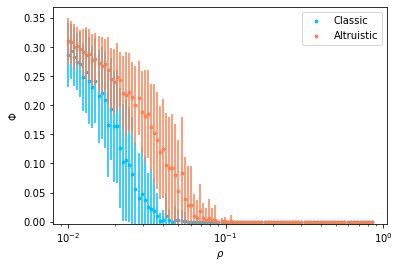

In [33]:
plt.errorbar(df2.index,df2['mean dissatisfaction final'],yerr=deviation2['mean dissatisfaction final'],ls = "None",color="deepskyblue")
plt.errorbar(df3.index,df3['mean dissatisfaction final'],yerr=deviation3['mean dissatisfaction final'],ls = "None",color="coral")
plt.scatter(df2.index,df2['mean dissatisfaction final'],s=8,marker='o',color="deepskyblue",label="Classic")
plt.scatter(df3.index,df3['mean dissatisfaction final'],s=8,marker='o',color="coral",label="Altruistic")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\Phi$")
plt.xscale('log')
plt.ylim(bottom=-0.004)
plt.legend()
plt.savefig("mean_dissatisfaction.png")

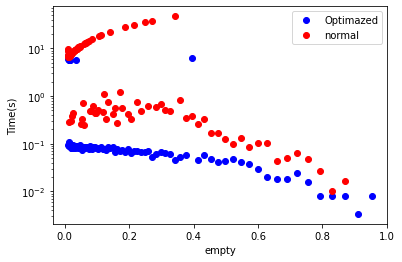

In [19]:
df = pd.read_csv('schelling_values_optimization_model_2_30.csv',delimiter=";")
plt.plot(df['empty'],df['time opimaized'],'bo',label="Optimazed")
plt.plot(df['empty'],df['time no optimized'],'ro',label="normal")
plt.xlabel("empty")
plt.ylabel("Time(s)")
plt.yscale("log")
plt.legend()

In [20]:
df2_04 = pd.read_csv('schelling_values_100_model_2_30_04.csv',delimiter=";")
df3_04 = pd.read_csv('schelling_values_100_model_3_30_04.csv',delimiter=";")
df2_04 = df2_04.where(df2_04['number of iterations']!=30000)
df3_04 = df3_04.where(df3_04['number of iterations']!=30000)
indexes = df2_04['vacant'].drop_duplicates().dropna()
cols = ['vacant','similarity ratio inicial','mean dissatisfaction inicial','mean interratial pears inicial A','mean interratial pears inicial B','mean interratial pears inicial','similarity ratio final',\
        'mean dissatisfaction final','mean interratial pears final A','mean interratial pears final B','mean interratial pears final','number of iterations']
deviation2_04 = pd.DataFrame(columns=cols)
deviation3_04 = pd.DataFrame(columns=cols)
count  =0
for i in indexes:
    deviation2_04.loc[count] = df2_04.where(df2_04['vacant']==i).std()
    deviation3_04.loc[count] = df3_04.where(df3_04['vacant']==i).std()
    count +=1
df2_04 = df2_04.groupby("vacant").mean()
df3_04 = df3_04.groupby("vacant").mean()

In [21]:
df2_06 = pd.read_csv('schelling_values_100_model_2_30_06.csv',delimiter=";")
df3_06 = pd.read_csv('schelling_values_100_model_3_30_06.csv',delimiter=";")
df2_06 = df2_06.where(df2_06['number of iterations']!=30000)
df3_06 = df3_06.where(df3_06['number of iterations']!=30000)
indexes = df2_06['vacant'].drop_duplicates().dropna()
cols = ['vacant','similarity ratio inicial','mean dissatisfaction inicial','mean interratial pears inicial A','mean interratial pears inicial B','mean interratial pears inicial','similarity ratio final',\
        'mean dissatisfaction final','mean interratial pears final A','mean interratial pears final B','mean interratial pears final','number of iterations']
deviation2_06 = pd.DataFrame(columns=cols)
deviation3_06 = pd.DataFrame(columns=cols)
count  =0
for i in indexes:
    deviation2_06.loc[count] = df2_06.where(df2_06['vacant']==i).std()
    deviation3_06.loc[count] = df3_06.where(df3_06['vacant']==i).std()
    count +=1
df2_06 = df2_06.groupby("vacant").mean()
df3_06 = df3_06.groupby("vacant").mean()

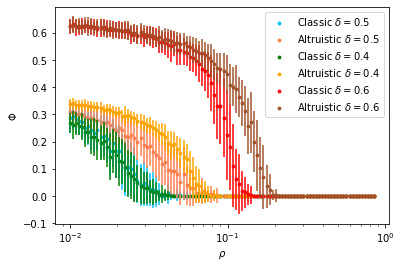

In [22]:
plt.errorbar(df2.index,df2['mean dissatisfaction final'],yerr=deviation2['mean dissatisfaction final'],ls = "None",color="deepskyblue")
plt.errorbar(df3.index,df3['mean dissatisfaction final'],yerr=deviation3['mean dissatisfaction final'],ls = "None",color="coral")
plt.scatter(df2.index,df2['mean dissatisfaction final'],s=8,marker='o',color="deepskyblue",label="Classic $\delta=0.5$")
plt.scatter(df3.index,df3['mean dissatisfaction final'],s=8,marker='o',color="coral",label="Altruistic $\delta=0.5$")
plt.errorbar(df2_04.index,df2_04['mean dissatisfaction final'],yerr=deviation2_04['mean dissatisfaction final'],ls = "None",color="green")
plt.errorbar(df3_04.index,df3_04['mean dissatisfaction final'],yerr=deviation3_04['mean dissatisfaction final'],ls = "None",color="orange")
plt.scatter(df2_04.index,df2_04['mean dissatisfaction final'],s=8,marker='o',color="green",label="Classic $\delta=0.4$")
plt.scatter(df3_04.index,df3_04['mean dissatisfaction final'],s=8,marker='o',color="orange",label="Altruistic $\delta=0.4$")
plt.errorbar(df2_06.index,df2_06['mean dissatisfaction final'],yerr=deviation2_06['mean dissatisfaction final'],ls = "None",color="red")
plt.errorbar(df3_06.index,df3_06['mean dissatisfaction final'],yerr=deviation3_06['mean dissatisfaction final'],ls = "None",color="sienna")
plt.scatter(df2_06.index,df2_06['mean dissatisfaction final'],s=8,marker='o',color="red",label="Classic $\delta=0.6$")
plt.scatter(df3_06.index,df3_06['mean dissatisfaction final'],s=8,marker='o',color="sienna",label="Altruistic $\delta=0.6$")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\Phi$")
plt.xscale('log')
plt.legend()
plt.savefig('dif_thresh_disatisfaction.png')

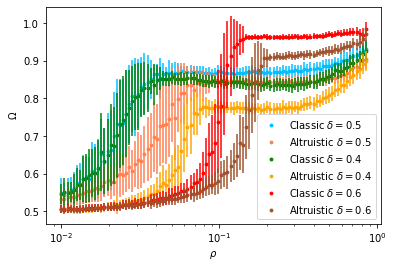

In [23]:
plt.errorbar(df2.index,df2['similarity ratio final'],yerr=deviation2['similarity ratio final'],ls = "None",color="deepskyblue")
plt.errorbar(df3.index,df3['similarity ratio final'],yerr=deviation3['similarity ratio final'],ls = "None",color="coral")
plt.scatter(df2.index,df2['similarity ratio final'],s=8,marker='o',color="deepskyblue",label="Classic $\delta=0.5$")
plt.scatter(df3.index,df3['similarity ratio final'],s=8,marker='o',color="coral",label="Altruistic $\delta=0.5$")
plt.errorbar(df2_04.index,df2_04['similarity ratio final'],yerr=deviation2_04['similarity ratio final'],ls = "None",color="green")
plt.errorbar(df3_04.index,df3_04['similarity ratio final'],yerr=deviation3_04['similarity ratio final'],ls = "None",color="orange")
plt.scatter(df2_04.index,df2_04['similarity ratio final'],s=8,marker='o',color="green",label="Classic $\delta=0.4$")
plt.scatter(df3_04.index,df3_04['similarity ratio final'],s=8,marker='o',color="orange",label="Altruistic $\delta=0.4$")
plt.errorbar(df2_06.index,df2_06['similarity ratio final'],yerr=deviation2_06['similarity ratio final'],ls = "None",color="red")
plt.errorbar(df3_06.index,df3_06['similarity ratio final'],yerr=deviation3_06['similarity ratio final'],ls = "None",color="sienna")
plt.scatter(df2_06.index,df2_06['similarity ratio final'],s=8,marker='o',color="red",label="Classic $\delta=0.6$")
plt.scatter(df3_06.index,df3_06['similarity ratio final'],s=8,marker='o',color="sienna",label="Altruistic $\delta=0.6$")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\Omega$")
plt.xscale('log')
plt.legend()
plt.savefig('dif_similarity.png')

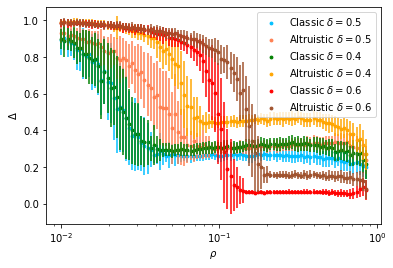

In [24]:
plt.errorbar(df2.index,df2['mean interratial pears final'],yerr=deviation2['mean interratial pears final'],ls = "None",color="deepskyblue")
plt.errorbar(df3.index,df3['mean interratial pears final'],yerr=deviation3['mean interratial pears final'],ls = "None",color="coral")
plt.scatter(df2.index,df2['mean interratial pears final'],s=8,marker='o',color="deepskyblue",label="Classic $\delta=0.5$")
plt.scatter(df3.index,df3['mean interratial pears final'],s=8,marker='o',color="coral",label="Altruistic $\delta=0.5$")
plt.errorbar(df2_04.index,df2_04['mean interratial pears final'],yerr=deviation2_04['mean interratial pears final'],ls = "None",color="green")
plt.errorbar(df3_04.index,df3_04['mean interratial pears final'],yerr=deviation3_04['mean interratial pears final'],ls = "None",color="orange")
plt.scatter(df2_04.index,df2_04['mean interratial pears final'],s=8,marker='o',color="green",label="Classic $\delta=0.4$")
plt.scatter(df3_04.index,df3_04['mean interratial pears final'],s=8,marker='o',color="orange",label="Altruistic $\delta=0.4$")
plt.errorbar(df2_06.index,df2_06['mean interratial pears final'],yerr=deviation2_06['mean interratial pears final'],ls = "None",color="red")
plt.errorbar(df3_06.index,df3_06['mean interratial pears final'],yerr=deviation3_06['mean interratial pears final'],ls = "None",color="sienna")
plt.scatter(df2_06.index,df2_06['mean interratial pears final'],s=8,marker='o',color="red",label="Classic $\delta=0.6$")
plt.scatter(df3_06.index,df3_06['mean interratial pears final'],s=8,marker='o',color="sienna",label="Altruistic $\delta=0.6$")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\Delta$")
plt.xscale('log')
plt.legend()
plt.savefig('dif_interratial.png')

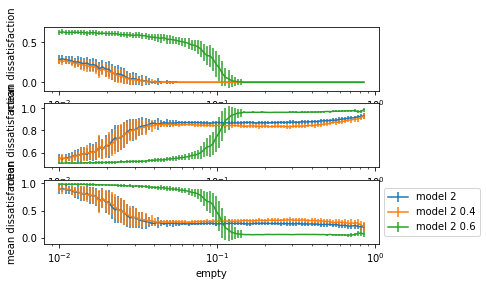

In [25]:

plt.subplot(3, 1, 1)
plt.errorbar(df2.index,df2['mean dissatisfaction final'],yerr=deviation2['mean dissatisfaction final'],label="model 2")
plt.errorbar(df2_04.index,df2_04['mean dissatisfaction final'],yerr=deviation2_04['mean dissatisfaction final'],label="model 2 0.4")
plt.errorbar(df2_06.index,df2_06['mean dissatisfaction final'],yerr=deviation2_06['mean dissatisfaction final'],label="model 2 0.6")
plt.xlabel("empty")
plt.ylabel("mean dissatisfaction")
plt.xscale('log')

plt.subplot(3,1,2)
plt.errorbar(df2.index,df2['similarity ratio final'],yerr=deviation2['similarity ratio final'],label="model 2")
plt.errorbar(df2_04.index,df2_04['similarity ratio final'],yerr=deviation2_04['similarity ratio final'],label="model 2 0.4")
plt.errorbar(df2_06.index,df2_06['similarity ratio final'],yerr=deviation2_06['similarity ratio final'],label="model 2 0.6")
plt.xlabel("empty")
plt.ylabel("mean dissatisfaction")
plt.xscale('log')

plt.subplot(3,1,3)
plt.errorbar(df2.index,df2['mean interratial pears final'],yerr=deviation2['mean interratial pears final'],label="model 2")
plt.errorbar(df2_04.index,df2_04['mean interratial pears final'],yerr=deviation2_04['mean interratial pears final'],label="model 2 0.4")
plt.errorbar(df2_06.index,df2_06['mean interratial pears final'],yerr=deviation2_06['mean interratial pears final'],label="model 2 0.6")
plt.xlabel("empty")
plt.ylabel("mean dissatisfaction")
plt.xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))